# Section 1: Import Packages

In [39]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

# Section 2: Data Preprocessing

### Tumor Classification

In [40]:
path='./Data'
pd.DataFrame(os.listdir(path),columns=['Files'])

,Files
0,meningioma_tumor
1,glioma_tumor
2,pituitary_tumor
3,normal


### Data Splitting (70% for training, 10% for validation, 20% for testing)


In [41]:
# Define the directory containing your image data
data_directory = path

# Create a TensorFlow dataset
batch_size = 32
image_size = (256, 256)  # Adjust the size as needed
validation_split = 0.3

# Create a training set
train = tf.keras.utils.image_dataset_from_directory(
    data_directory,
    validation_split=validation_split,  # 20% of the data for validation
    subset="training",
    seed=123,  # Set a random seed for reproducibility
    image_size=image_size,
    batch_size=batch_size,
)

# Create a validation and test set
val_test_dataset = tf.keras.utils.image_dataset_from_directory(
    data_directory,
    validation_split=0.2,  # 20% of the data for validation
    subset="validation",
    seed=123,  # Use the same seed for consistency
    image_size=image_size,
    batch_size=batch_size,
)

val_batches = tf.data.experimental.cardinality(val_test_dataset)
test = val_test_dataset.take((2*val_batches) // 3)
validation = val_test_dataset.skip((2*val_batches) // 3)

Found 3096 files belonging to 4 classes.
Using 2168 files for training.
Found 3096 files belonging to 4 classes.
Using 619 files for validation.
(32, 224, 224, 3)


### Create directories for dataset

In [42]:
# # Define the directory where you want to save the organized datasets
# output_directory = "./Organized_Data"

# # Create directories for each dataset
# if not os.path.exists(os.path.join(output_directory, "train")) and not os.path.exists(os.path.join(output_directory, "validation")) and not os.path.exists(os.path.join(output_directory, "test")):
#         os.makedirs(os.path.join(output_directory, "train"), exist_ok=True)
#         os.makedirs(os.path.join(output_directory, "validation"), exist_ok=True)
#         os.makedirs(os.path.join(output_directory, "test"), exist_ok=True)

#         # Function to save the images to the specified directory
#         def save_images(dataset, directory):
#             for images, labels in dataset:
#                 for i, image in enumerate(images):
#                     label = labels[i].numpy()
#                     class_directory = os.path.join(directory, str(label))
#                     os.makedirs(class_directory, exist_ok=True)
#                     image_file = os.path.join(class_directory, f"image_{i}.jpg")
#                     tf.keras.preprocessing.image.save_img(image_file, image)

#         # Save the datasets to their respective directories
#         save_images(train, os.path.join(output_directory, "train"))
#         save_images(validation, os.path.join(output_directory, "validation"))
#         save_images(test, os.path.join(output_directory, "test"))


### Class names

In [43]:
class_names = train.class_names
class_names

['glioma_tumor', 'meningioma_tumor', 'normal', 'pituitary_tumor']

### Images

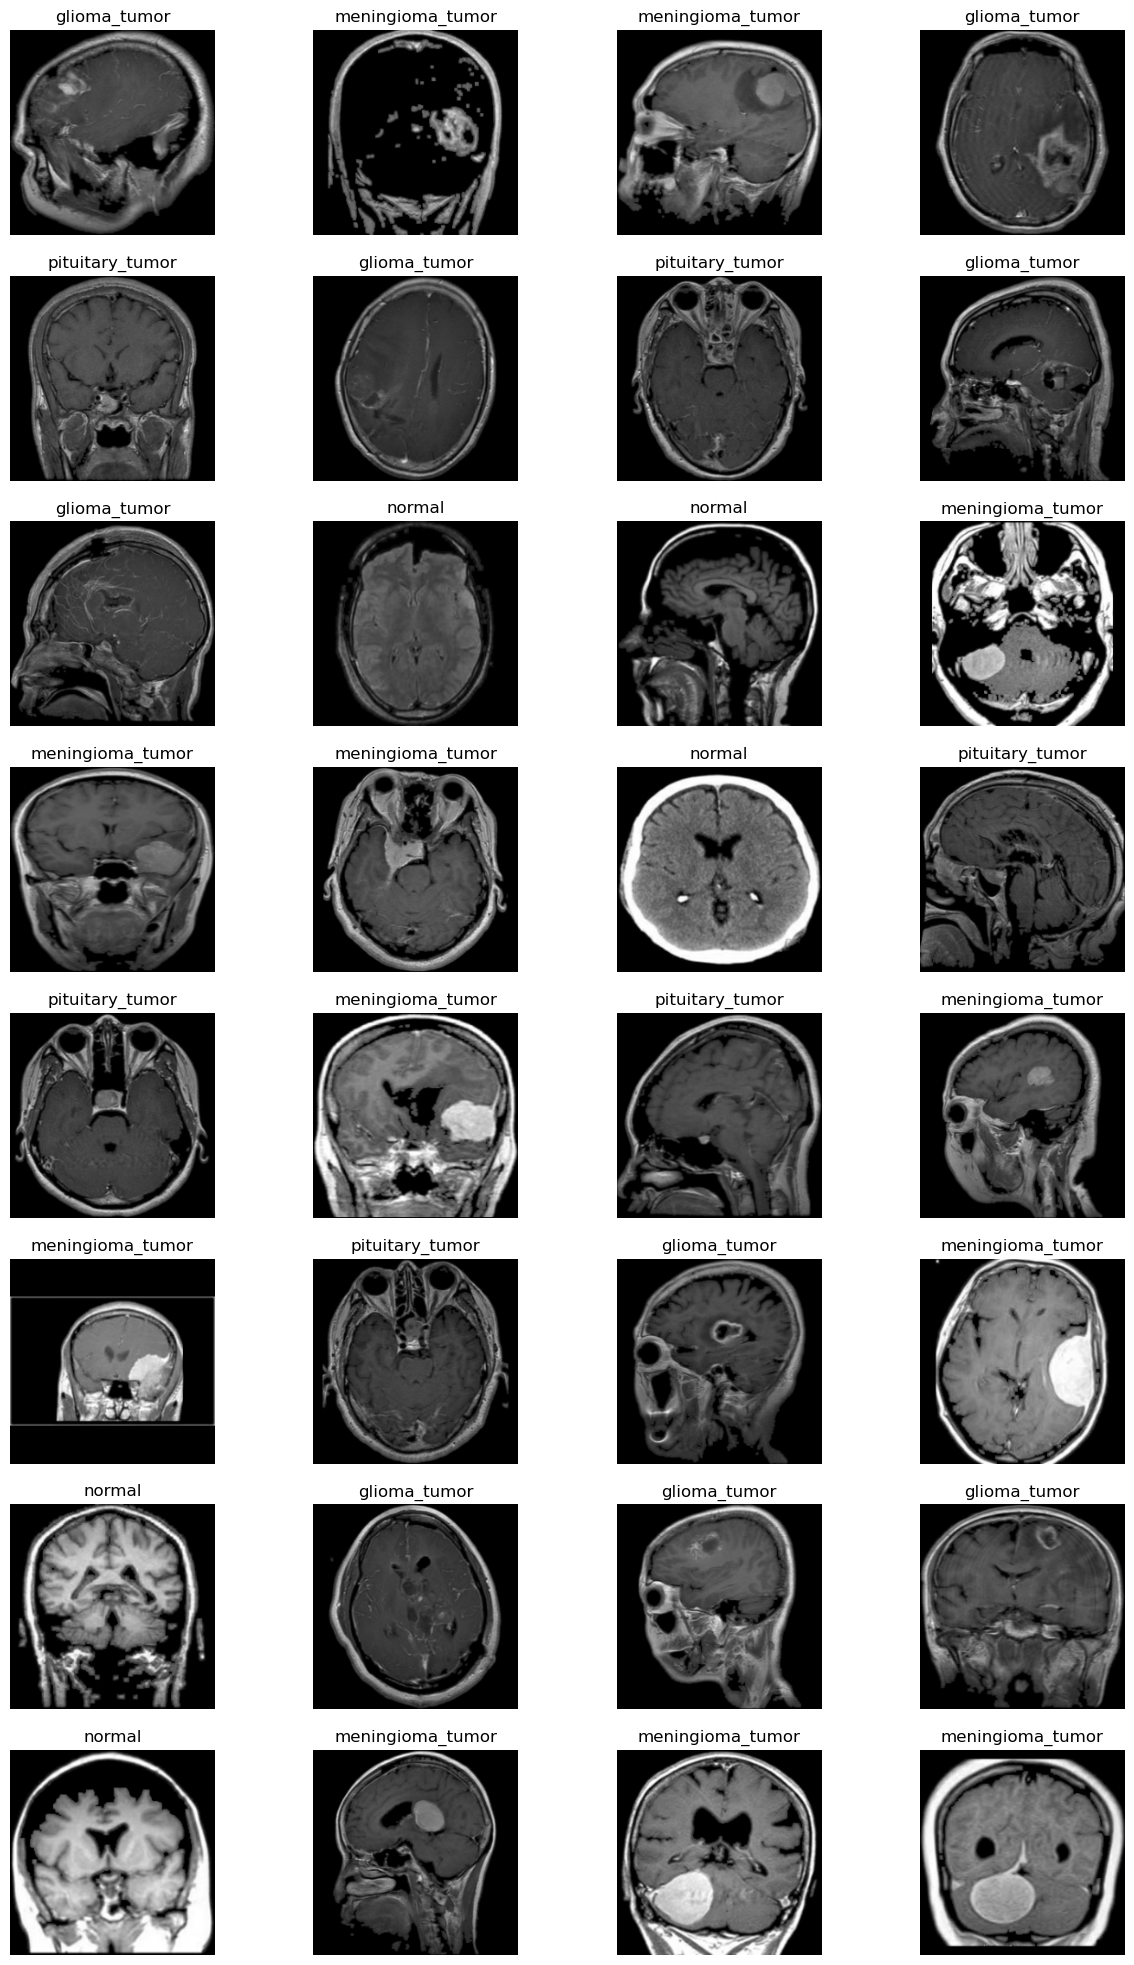

In [44]:
plt.figure(figsize=(15, 25))
for images, labels in train.take(1): # iterate over the 1st batch in train set
    for i in range(32):
        ax = plt.subplot(8, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")
        

### Training data augmentation

# Section 3: Building CNN

### Initializing the CNN

In [45]:
cnn = tf.keras.models.Sequential()

### Convolution

In [46]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu',input_shape=[256,256,3]))

### Pooling

In [47]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=2))

### Adding a second convolutional layer

In [48]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=2))

### Flattening

In [49]:
cnn.add(tf.keras.layers.Flatten())

### Fully Connection

In [ ]:
cnn.add(tf.keras.layers.Dense(units=128,activation='relu'))
cnn.add(tf.keras.layers.Dense(units=64,activation='relu'))

### Output Layer

In [50]:
cnn.add(tf.keras.layers.Dense(units=4,activation='linear'))

# Section 4: Training the CNN

### Compiling the CNN

In [58]:
cnn.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(0.01),
    metrics = ['accuracy']
)

### Training the CNN on Training set

In [59]:
# train is a Tensorflow dataset that contains both the input data and labels, so there's no need to split it into x and y separately
cnn.fit(train, validation_data = validation, epochs = 25)

Epoch 1/25
68/68 [==============================] - 18s 259ms/step - loss: 80.3344 - accuracy: 0.2966 - val_loss: 1.3360 - val_accuracy: 0.3300
Epoch 2/25
68/68 [==============================] - 18s 258ms/step - loss: 1.3493 - accuracy: 0.2984 - val_loss: 1.3525 - val_accuracy: 0.2611
Epoch 3/25
68/68 [==============================] - 17s 252ms/step - loss: 1.3467 - accuracy: 0.3007 - val_loss: 1.3392 - val_accuracy: 0.2857
Epoch 4/25
68/68 [==============================] - 17s 254ms/step - loss: 1.3468 - accuracy: 0.3007 - val_loss: 1.3263 - val_accuracy: 0.3251
Epoch 5/25
68/68 [==============================] - 17s 251ms/step - loss: 1.3468 - accuracy: 0.3007 - val_loss: 1.3359 - val_accuracy: 0.3202
Epoch 6/25
68/68 [==============================] - 17s 247ms/step - loss: 1.3467 - accuracy: 0.3007 - val_loss: 1.3515 - val_accuracy: 0.2956
Epoch 7/25
68/68 [==============================] - 17s 248ms/step - loss: 1.3470 - accuracy: 0.2869 - val_loss: 1.3271 - val_accuracy: 0.325

# Section 5: Evaluating the CNN

### Making a single prediction

1/1 [==============================] - 0s 42ms/step
[[ 0.27151996  0.2885637  -0.54872406  0.12366512]]


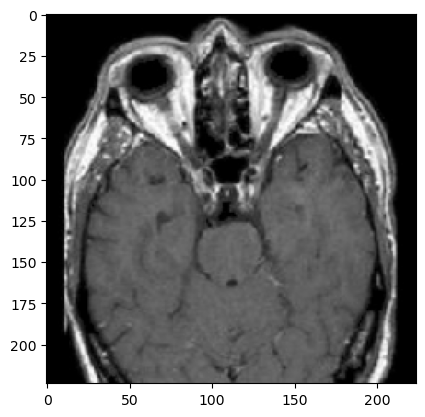

In [61]:
# ax = plt.subplot(8, 4, i + 1)
# plt.imshow(train.take(1)[0][0].numpy().astype("uint8"))
# plt.title(class_names[labels[i]])
# plt.axis("off")
from keras.preprocessing import image

test_img = image.load_img('./Data/normal/N_1.jpg', target_size=(256,256))
plt.imshow(test_img)
test_img = image.img_to_array(test_img)

# We train the CNN based on batch so we need to convert test_img into batch (adding 1 more dimension)

test_img = np.expand_dims(test_img, axis=0)

result = cnn.predict(test_img)

print(result)